## LTKHDL - Final Project
### Nguyễn Thành Nhân - `1712631`
---

# MÔ TẢ DỮ LIỆU
- Dữ liệu về `US Police Shootings` - file *shootings.csv*
- Nguồn dữ liệu: https://www.kaggle.com/ahsen1330/us-police-shootings
- Gần đây, có một sự việc xảy ra giữa cảnh sát và người dân ở Mỹ nói riêng, và một số vụ giết người nói chung, làm dấy lên làn sóng tranh cãi về vấn đề nhức nhối là xung đột, phân biệt chủng tộc - sắc tộc - "Racism"(https://vi.wikipedia.org/wiki/C%C3%A1i_ch%E1%BA%BFt_c%E1%BB%A7a_George_Floyd), do đó tác giả đã thu thập một số dữ liệu từ các nguồn trên Kaggle để đưa ra một số hiểu biết sâu sắc và phân tích câu chuyện xung quanh nạn phân biệt chủng tộc ở Mỹ.
- Dataset owner:  Ahsen Nazir - https://www.kaggle.com/ahsen1330
- Usage Information: Public

- **Dữ liệu được sử dụng cho mục đích học tập, không nhằm mục đích thương mại - chính trị - tôn giáo**
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Khám phá dữ liệu

In [2]:
df = pd.read_csv('shootings.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

#### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [4]:
print(f'num_rows = {df.shape[0]}')
print(f'num_cols = {df.shape[1]}')

num_rows = 4895
num_cols = 15


#### Mỗi dòng, cột có ý nghĩa như thế nào?

##### Theo mô tả từ Kaggle:
- `ID`: Identity of  event
- `name`: name of shot person
- `date`: the date the shooting occurred
- `manner_of_death`: How they were killed? (e.g. Shot, Tasered, etc)
- `armed`: Weapons
- `age`: age of shot person
- `gender`: gender of shot person (F or M)
- `race`: race of shot person
- `city`: location (City) of event
- `state`: location (State) of event
- `signs_of_mental_illness`:  Did they show any mental illness?
- `threat_level`: level of Threat
- `flee`: Did the suspect flee?
- `body_camera`: Was the policeman wearing a camera/was the incident recorded?
- `arms_category`: A category column holds type of weapon used by the suspect

Nhìn vào dữ liệu ở `shootings.csv`, ta có thể thấy là mỗi dòng ứng với thông tin của một vụ giết người (bắn).

#### Dtype của các cột

In [5]:
col_dtypes = df.dtypes
col_dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

**Theo mô tả dữ liệu, ta có thể thấy các cột dữ liệu có dtype = 'object' đều là dữ liệu dạng string**

Kiểm tra nhận xét trên:

In [6]:
def open_object_dtype(s):
    dtypes = set()
    for i in range(s.shape[0]):
        if not type(s.iloc[i]) in dtypes:
            dtypes.add(type(s.iloc[i])) 
    return dtypes
col = ['name', 'manner_of_death', 'armed', 'gender', 'race', 'city','state', 'threat_level', 'flee', 'arms_category']

for c in col:
    print(open_object_dtype(df[c]))

{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}


Vậy, tất cả các cột dữ liệu dạng `object` đều là string

### Tiền xử lí dữ liệu
*Giải quyết các vấn đề của dữ liệu*

#### Kiểm tra các giá trị bị khuyết

In [7]:
df.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

Ta có thể thấy có vẻ là không có mẫu dữ liệu nào bị khuyết. So good (xD)

#### Xử lí dữ liệu datetime:
Chuyển dữ liệu cột `date` về dạng datetime, kiểm tra miền giá trị của các năm mà dữ liệu được thu thập

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dt.year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

## KHÁM PHÁ DỮ LIỆU

#### Xem xét miền giá trị của các cột dữ liệu Numeric và datetime

In [9]:
numeric_col = ['id', 'date','age']
max = df[numeric_col].max(axis = 0)
min =  df[numeric_col].min(axis = 0)
numeric_col_ranges_df = pd.DataFrame(data = [min,max],index = ['min','max']).T
numeric_col_ranges_df

,min,max
id,3,5925
date,2015-01-02 00:00:00,2020-06-15 00:00:00
age,6,91


#### Xem xét miền giá trị của các cột dữ liệu categorical

In [10]:
cat_col = ['name', 'manner_of_death', 'armed', 'gender', 'race', 'city','state', 'threat_level', 'flee', 'arms_category']

NumUniqueVals = df[cat_col].nunique()
ThreeFirstVals = pd.Series([sorted(df[c].unique())[0:3] for c in cat_col],index = cat_col)
cat_col_ranges_df = pd.DataFrame(data = [NumUniqueVals,ThreeFirstVals],index = ["NumUniqueVals", "ThreeFirstVals"]).T
cat_col_ranges_df

,NumUniqueVals,ThreeFirstVals
name,4851,"[ Austin Wilburly Reid, A'Donte Washington, A..."
manner_of_death,2,"[shot, shot and Tasered]"
armed,89,"[BB gun, BB gun and vehicle, Taser]"
gender,2,"[F, M]"
race,6,"[Asian, Black, Hispanic]"
city,2288,"[Abbeville, Aberdeen, Abilene]"
state,51,"[AK, AL, AR]"
threat_level,3,"[attack, other, undetermined]"
flee,4,"[Car, Foot, Not fleeing]"
arms_category,12,"[Blunt instruments, Electrical devices, Explos..."


#### ID có phải là thuộc tính có giá trị duy nhất không?

In [11]:
df['id'].nunique() == df.shape[0]

True

ID chính là giá trị duy nhất cho mỗi mẫu dữ liệu

#### Làm rõ các cột `city` và `state`

Theo Quora, State là một đơn vị hành chính bao gồm nhiều Cities, Countries, region, villages, town, etc.. (https://qr.ae/pN2mFS).

Vì vậy, ta kiểm tra xem có city nào thuộc nhiều hơn 1 state không

In [12]:
num_State_df = df.groupby('city').agg({'state':'nunique'})
idx = num_State_df[num_State_df['state'] > 1].index.to_list()
multi_state_ratio = (num_State_df.loc[idx].sum()/num_State_df.sum()).values
multi_state_ratio

array([0.18908382])

Danh sách các city thuộc nhiều hơn 1 state và state tương ứng - id để định danh các mẫu dữ liệu là duy nhất

In [13]:
df[df['city'].isin(idx)].sort_values(by = 'city')[['id','city','state']]

,id,city,state
4232,5025,Aberdeen,WA
3350,3904,Aberdeen,NC
1069,1254,Abingdon,MD
2603,3003,Abingdon,VA
1615,1867,Albany,GA
...,...,...,...
1834,2112,York,NE
2736,3173,York,SC
767,930,York,PA
1772,2048,York County,PA


# ĐƯA RA CÁC CÂU HỎI


## 1. Độ tuổi của các nạn nhân được phân bố như thế nào?

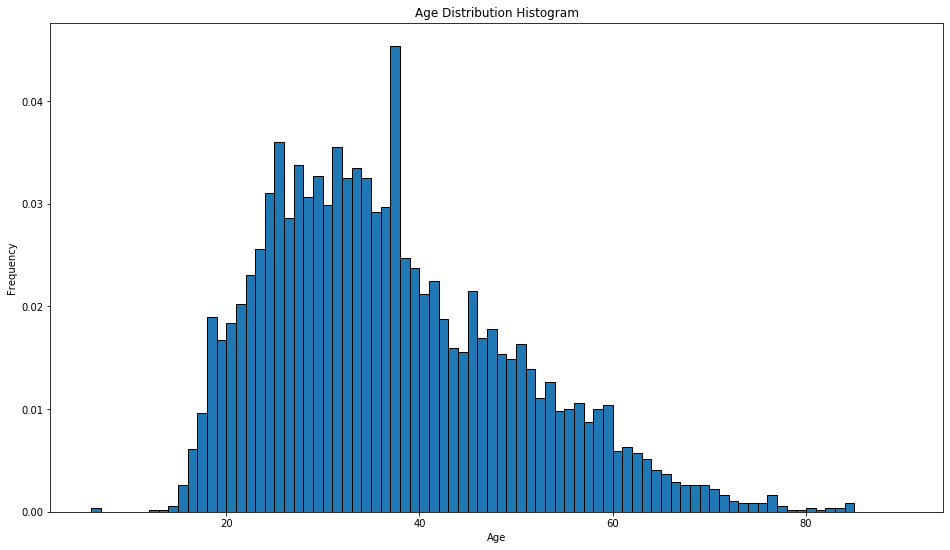

In [14]:
bins = range(int(numeric_col_ranges_df.loc['age','min']),int(numeric_col_ranges_df.loc['age','max']))
bins 
plt.figure(figsize = (16,9))
plt.hist(df['age'], bins = bins,edgecolor = 'black',density = True)
plt.gca().set(title='Age Distribution Histogram', xlabel = 'Age', ylabel='Frequency');
plt.show()

Nhận xét:
- Phân bố độ tuổi tập trung nhiều ở nhóm người từ 20 đến 40 tuổi

## 2. Số 'event' diễn ra theo Thời gian

#### Số 'event' theo năm

Lọc ra `ID` và `Year` của dataframe, sau đó dùng barchart để xem sự thay đổi qua các năm

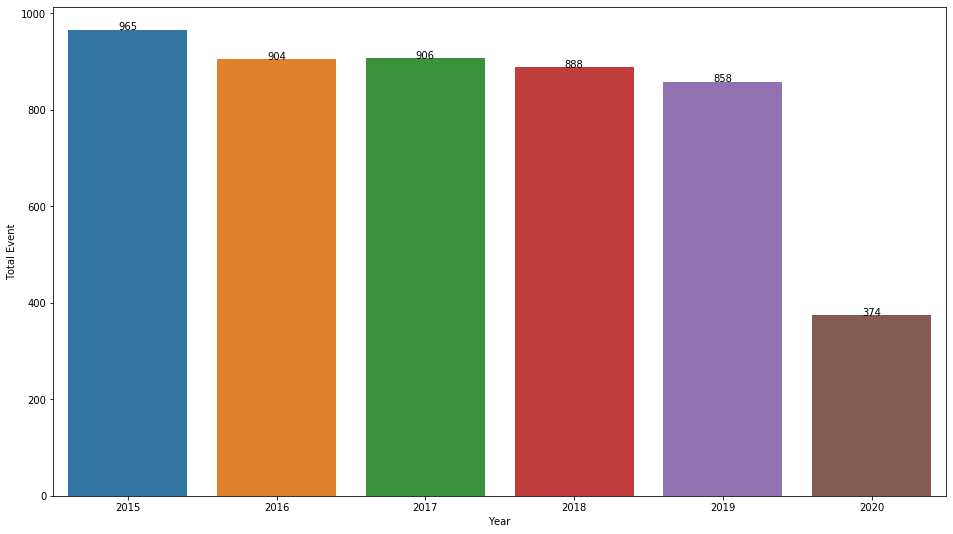

In [15]:
event_by_year = df[['id']].copy()
event_by_year['Year'] = df['date'].dt.year.copy()
year_count_df = event_by_year.groupby('Year').agg({'id':'nunique'}).reset_index()

plt.figure(figsize = (16,9))
ax = sns.barplot(x = 'Year',y = 'id',data = year_count_df)
ax.set(xlabel='Year', ylabel='Total Event')
for index, row in year_count_df.iterrows():
    ax.text(row.name,row.id, row.id, color='black', ha="center")

plt.show()

Nhận xét:
- Có vẻ là số vụ việc diễn ra thay đổi không đáng kể theo từng năm.
- Năm 2020 xảy ra ít vụ việc nhất, tuy nhiên dữ liệu chỉ được thu thập đến ngày 15-6, do đó điều này không nói lên gì cả

### Số 'event' diễn ra như thế nào theo các tháng


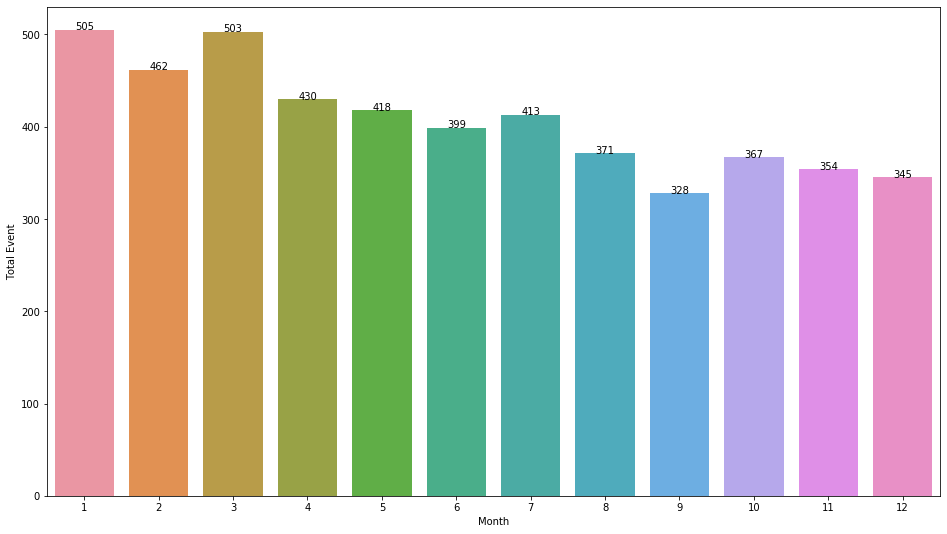

In [16]:
event_by_datetime = df[['id']].copy()
event_by_datetime['Month'] = df['date'].dt.month.copy()
month_count_df = event_by_datetime.groupby('Month').agg({'id':'nunique'}).reset_index()

plt.figure(figsize = (16,9))
ax = sns.barplot(x = 'Month',y = 'id',data = month_count_df)
ax.set(xlabel='Month', ylabel='Total Event')
for index, row in month_count_df.iterrows():
    ax.text(row.name,row.id, row.id, color='black', ha="center")

plt.show()

Nhận xét:
- Có vẻ là số vụ việc diễn ra thay đổi không đáng kể theo các tháng
- Những tháng đầu năm là những tháng xảy ra sự việc nhiều nhất

## 3. Loại vũ khí cảnh sát sử dụng có liên quan đến người đó có mang camera không?


In [17]:
armed_camera_df = df[['armed','body_camera']]
armed_camera_df 

,armed,body_camera
0,gun,False
1,gun,False
2,unarmed,False
3,toy weapon,False
4,nail gun,False
...,...,...
4890,Taser,True
4891,gun,False
4892,unarmed,False
4893,gun,False


Kiểm tra các giá trị rời rạc của `body_camera` và `armed`

In [18]:
armed_camera_df['body_camera'].unique(),armed_camera_df['armed'].unique()

(array([False,  True]),
 array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'unknown',
        'shovel', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
        'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
        'guns and explosives', 'cordless drill', 'metal pole', 'Taser',
        'metal pipe', 'metal hand tool', 'blunt object', 'metal stick',
        'sharp object', 'meat cleaver', 'carjack', 'chain',
        "contractor's level", 'stapler', 'crossbow', 'bean-bag gun',
        'baseball bat and fireplace poker', 'straight edge razor',
        'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
        'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
        'flashlight', 'vehicle', 'spear', 'chair', 'pitchfork',
        'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
        'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
        'crowbar', 'oar', 'machete and gun', 'air conditioner',
       

Bao nhiêu vũ khí được sử dụng khi mang camera và không?

In [19]:
armed_camera_df.groupby('body_camera').agg({'armed':'nunique'})

,armed
body_camera,
False,85
True,35


Những vũ khí nào không được sử dụng khi người mang nó có đeo camera

In [20]:
groupbycamera_df = armed_camera_df.groupby('body_camera').agg({'armed':'unique'}).reset_index()
camera_false = groupbycamera_df.loc[0,'armed'].tolist()
camera_true = groupbycamera_df.loc[1,'armed'].tolist()

In [41]:
for armed in armed_camera_df['armed'].unique():
    if armed in camera_false:
        if armed not in camera_true:
            print(armed)

nail gun
sword
metal object
lawn mower blade
flagpole
guns and explosives
cordless drill
metal pole
metal hand tool
blunt object
meat cleaver
carjack
contractor's level
stapler
crossbow
bean-bag gun
baseball bat and fireplace poker
brick
hand torch
chain saw
spear
chair
pitchfork
hatchet and gun
piece of wood
bayonet
pipe
glass shard
motorcycle
pepper spray
metal rake
baton
oar
machete and gun
air conditioner
pole and knife
beer bottle
baseball bat and bottle
fireworks
pen
chainsaw
gun and sword
pellet gun
bow and arrow
gun and vehicle
vehicle and gun
walking stick
barstool
grenade
BB gun and vehicle
wasp spray
air pistol
baseball bat and knife
car, knife and mace


Nhận xét:
- Ta thấy flashlight, wrench, vehicle and machete, ice pick là những vũ khí không "chính thống" (Không có khả năng sát thương cao như súng, dao,...)
- Có thể đây là những trường hợp khẩn cấp

## 4. Giới tính của những người trong sự việc

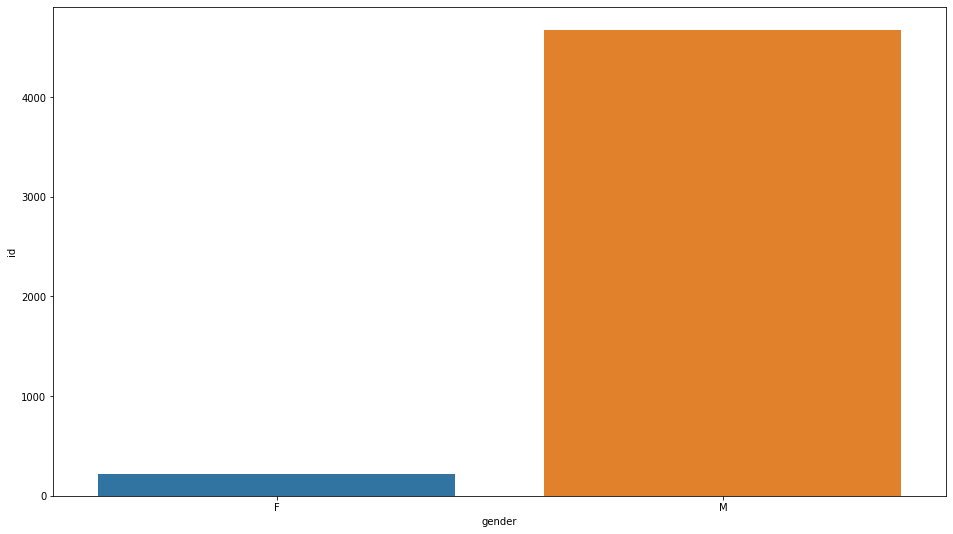

In [22]:
sex_df = df.groupby('gender').agg({'id':'count'}).reset_index()

plt.figure(figsize = (16,9))
sns.barplot(x = 'gender', y = 'id', data = sex_df)
plt.show()

Nhận xét:
- Nhìn chung, có vẻ là giới tính ảnh hưởng nhiều đến sự việc
- Nam giới có tỉ lệ cao hơn rất nhiều so với nữ giới

Để làm rõ hơn, chúng ta tính tỉ lệ của các nhóm giới tính

In [23]:
sex_df['ratio'] = sex_df['id'] / sex_df['id'].sum()
sex_df[['gender','ratio']]

,gender,ratio
0,F,0.045352
1,M,0.954648


Nam giới chiếm tỉ lệ gần 100%

## 5. Sự liên quan của Chủng tộc (Sắc tộc - `Race`) trong sự việc

In [24]:
race_df = df.groupby('race').agg({'id':'count'}).sort_values('id',ascending = False).reset_index()
race_df['ratio'] = race_df['id'] / race_df['id'].sum()
# race_df.rename(columns = {'id':'ratio'}, inplace = True)
race_df

,race,id,ratio
0,White,2476,0.505822
1,Black,1298,0.265169
2,Hispanic,902,0.184270
3,Asian,93,0.018999
4,Native,78,0.015935
5,Other,48,0.009806


Trực quan kết quả vừa nhận được

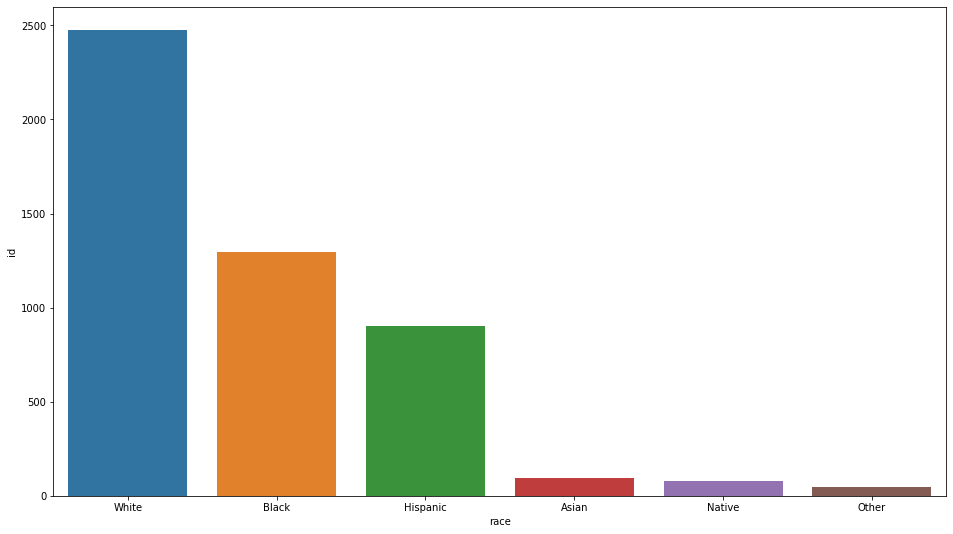

In [25]:
race_df = df.groupby('race').agg({'id':'count'}).sort_values('id',ascending = False).reset_index()

plt.figure(figsize = (16,9))
sns.barplot(x = 'race', y = 'id', data = race_df)
plt.show()

Nhận xét:
- Trong các sự việc liên quan đến nổ súng, hầu hết chủ đề được quan tâm nhất là Phân biệt chủng tộc - sắc tộc. Tuy nhiên, dựa vào biểu đồ phía trên, ta có thể thấy `White` chiếm tỉ lệ lớn nhất trong các vụ việc đả xảy ra (50%)

### Chúng ta cùng tìm hiểu về diễn biến của số người tử vong theo thời gian của từng sắc tộc

Xử lí dataframe cho từng race, chuyển date thành dạng yyyy-mm

In [26]:
race_by_time_df = df[['id','race']].copy()
race_by_time_df['month'] = df['date'].dt.month
race_by_time_df['year'] = df['date'].dt.year

race_event = race_by_time_df.groupby(['year','month','race']).agg({'id':'nunique'}).sort_values('id',ascending = False).reset_index()
race_event['date'] = race_event['year'].astype(str)+'-'+race_event['month'].astype(str)
race_event.drop(columns = ['year','month'],inplace = True)
race_event

,race,id,date
0,White,57,2015-7
1,White,53,2018-3
2,White,50,2016-1
3,White,49,2016-3
4,White,49,2018-1
...,...,...,...
319,Asian,1,2017-3
320,Native,1,2017-3
321,Native,1,2017-4
322,Native,1,2019-5


Biểu diễn sự thay đổi của số event diễn ra theo tháng và theo từng race

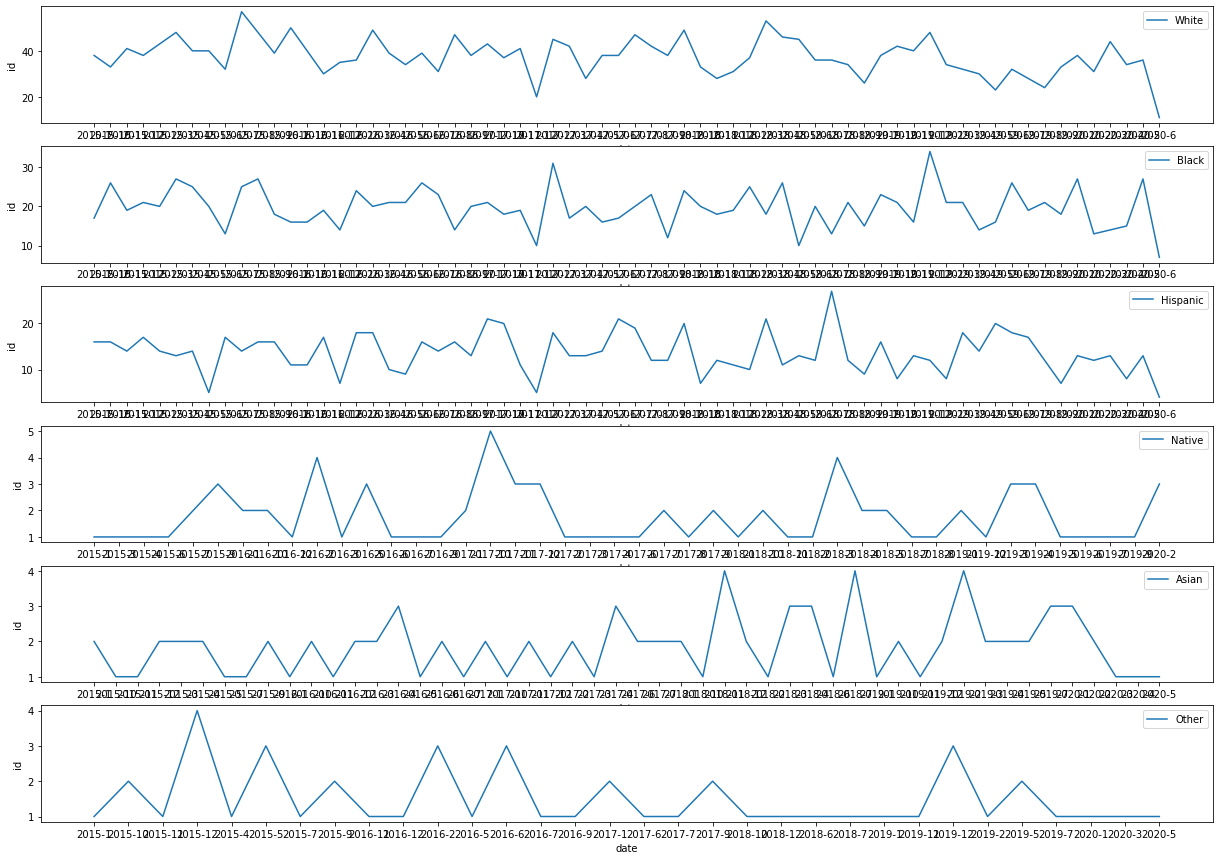

In [27]:
fig = plt.figure(figsize = (21,15))
num_race = range(race_event.race.nunique())
rows = race_event.race.nunique()
for i,race in zip(num_race,race_event.race.unique()):
    ax = fig.add_subplot(rows,1,i+1)
    sns.lineplot(x = 'date', y = 'id',data = race_event[race_event['race'] == race],label = race)
    

## 7. Sự liên quan của Vị trí địa lý (City - State)

In [28]:
state_df = df[['id','city']].copy()
# state_df['year'] = df['date'].dt.year

state_df = state_df.groupby(['city']).agg('count')[['id']].sort_values('id',ascending = False).reset_index()
state_df.head(10)

,city,id
0,Los Angeles,78
1,Phoenix,66
2,Houston,51
3,Las Vegas,41
4,San Antonio,40
5,Chicago,38
6,Columbus,36
7,Albuquerque,32
8,Jacksonville,31
9,St. Louis,30


Nhận xét:
- Los Angeles là thành phố có số ca nhiều nhất
- Các thành phố trong top10 thì có nhiều thành phố nổi tiếng của Mỹ: Houston, LA, Las Vegas, Chicago

## 8. Nạn nhân có chạy trốn không

Lọc các cột id và flee từ dataframe, tính tỉ lệ

In [29]:
flee_df = df[['id','flee']].copy()
flee_df = flee_df.groupby(['flee']).agg({'id':'nunique'}).reset_index()
flee_df['id'] = flee_df['id'] / flee_df['id'].sum()
flee_df

,flee,id
0,Car,0.167518
1,Foot,0.131154
2,Not fleeing,0.627783
3,Other,0.073544


In [30]:
flee_df['flee'].unique()

array(['Car', 'Foot', 'Not fleeing', 'Other'], dtype=object)

Trực quan bằng biểu đồ tổng hợp số lượng người chạy trốn bằng các phương tiện kể trên

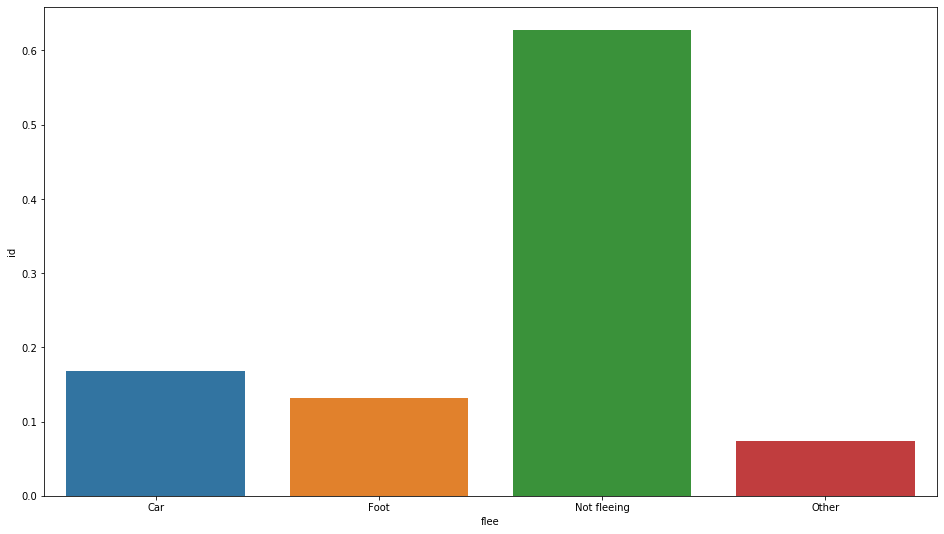

In [31]:
plt.figure(figsize = (16,9))
sns.barplot(x = 'flee', y = 'id', data = flee_df)

Nhận xét:
- Hầu hết những người này không chống cự
- Số khác chống cự bằng cách chạy trốn

## 9. Nguyên nhân tử vong của nạn nhân?

Kiểm tra các giá trị rời rạc của manner_of_death

In [33]:
df['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

Tính toán tỉ lệ của các giá trị trong manner_of_death

In [34]:
deaths_df = df[['manner_of_death','id']]
deaths_df = deaths_df.groupby(['manner_of_death']).agg({'id':'nunique'}).reset_index()
deaths_df['id'] = deaths_df['id'] / deaths_df['id'].sum()
deaths_df

,manner_of_death,id
0,shot,0.949336
1,shot and Tasered,0.050664


Nhận xét:
- Đa số các nạn nhân đều cùng một nguyên nhân, và số người được kiểm tra (Tasered) không nhiều (rất ít)

## 10. Loại vũ khí sử dụng trong sự việc liên quan gì đến độ nguy hiểm?

Kiểm tra các giá trị rời rạc của `threat_level` và `armed`

In [35]:
df['threat_level'].unique(),df['armed'].unique()

(array(['attack', 'other', 'undetermined'], dtype=object),
 array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'unknown',
        'shovel', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
        'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
        'guns and explosives', 'cordless drill', 'metal pole', 'Taser',
        'metal pipe', 'metal hand tool', 'blunt object', 'metal stick',
        'sharp object', 'meat cleaver', 'carjack', 'chain',
        "contractor's level", 'stapler', 'crossbow', 'bean-bag gun',
        'baseball bat and fireplace poker', 'straight edge razor',
        'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
        'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
        'flashlight', 'vehicle', 'spear', 'chair', 'pitchfork',
        'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
        'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
        'crowbar', 'oar', 'machete a

Ta groupby để kiểm tra số lượng vũ khí được sử dụng theo từng level

In [36]:
armed_df = df.groupby('threat_level').agg({'armed':'nunique'})
armed_df

,armed
threat_level,
attack,62
other,63
undetermined,12


Liệt kê các loại vũ khí được dùng khi `threat_level` là undetermined

In [37]:
undetermined = df.groupby('threat_level').agg({'armed':'unique'}).loc['undetermined'].to_list()
undetermined

[array(['unknown', 'gun', 'unarmed', 'carjack', 'baseball bat', 'pole',
        'shovel', 'knife', 'bayonet', 'air conditioner', 'toy weapon',
        'sword'], dtype=object)]

## 11. Loại vũ khí nào được sử dụng nhiều nhất

In [38]:
df.groupby('armed').agg({'id':'nunique'}).sort_values('id',ascending = False).reset_index().head(5)

,armed,id
0,gun,2755
1,knife,708
2,unknown,418
3,unarmed,348
4,toy weapon,171


Nhận xét:
- 3 trong 5 loại vũ khí được sử dụng nhiều nhất là các loại vũ khí chún ta thường thấy: gun, knife, toy weapon

## 12. Nạn nhân có dấu hiệu tâm thần không?

In [39]:
metal_df = df[['id','signs_of_mental_illness']]

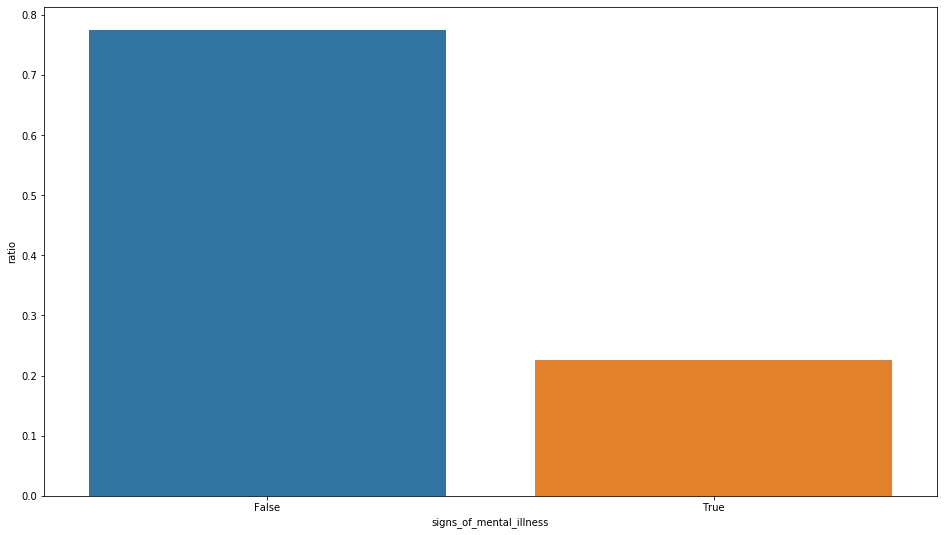

In [43]:
metal_group_df = metal_df.groupby(['signs_of_mental_illness']).agg({'id':'nunique'}).reset_index()
metal_group_df['ratio'] = metal_group_df['id'] / metal_group_df['id'].sum()
plt.figure(figsize = (16,9))
sns.barplot(x = 'signs_of_mental_illness', y = 'ratio', data = metal_group_df )

Nhận xét:
- Tỉ lệ người có dấu hiệu tâm thần khá cao (khoảng 20%) -> điều này khá nguy hiểm

## 13. Phân bố độ tuổi theo từng race

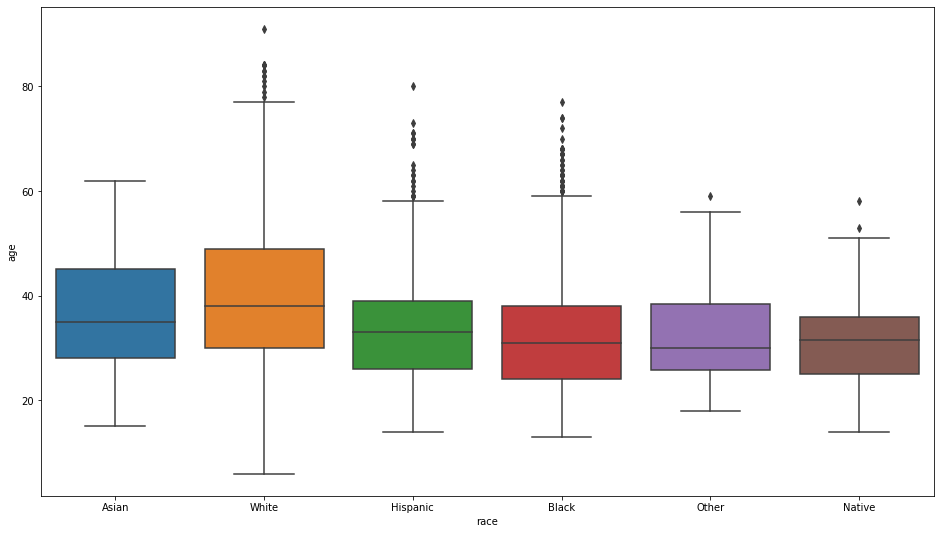

In [44]:
plt.figure(figsize = (16,9))
sns.boxplot(x = 'race', y = 'age', data = df)

Nhận xét:
- Hầu hết nạn nhân ở các race đều có độ tuổi khá gần nhau. 
- Trong các ouliers, White, Hispanic, Black có nhiều outliers nhất, các outliers này để ở độ tuổi già (trên 60)

## 14. Phân bố số lượng event theo từng State, City

In [55]:
state_df = df[['id','state']]
state_df.head(5)

,id,state
0,3,WA
1,4,OR
2,5,KS
3,8,CA
4,9,CO


Các State có số lượng event cao nhất

In [56]:
state_grouped_df = state_df.groupby(['state']).agg({'id':'nunique'}).sort_values('id',ascending = False).reset_index()
state_grouped_df.head(5)

,state,id
0,CA,701
1,TX,426
2,FL,324
3,AZ,222
4,CO,168


Biểu diễn bằng barplot

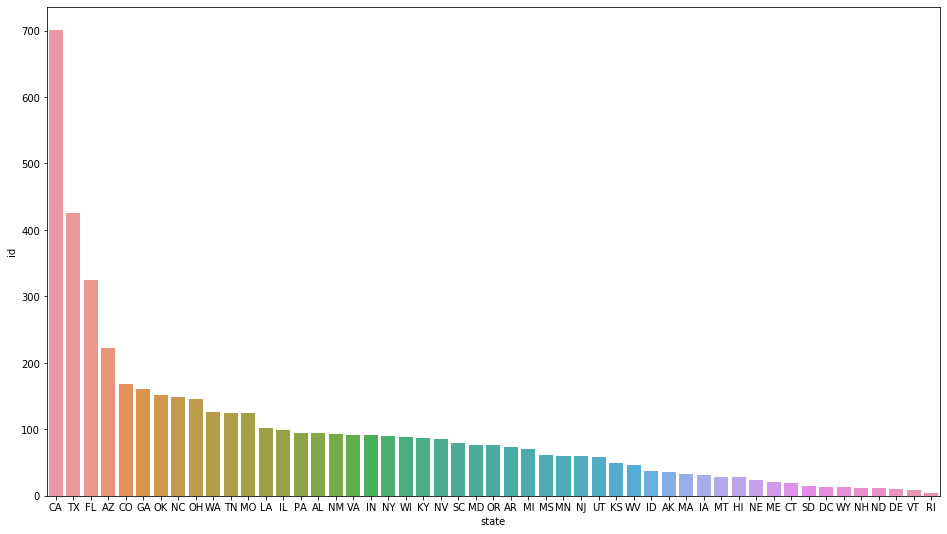

In [53]:
plt.figure(figsize = (16,9))
sns.barplot(x = 'state', y = 'id', data = state_grouped_df)

# Nhìn lại quá trình làm đồ án

- Khó khăn: Tìm dữ liệu, chủ đề
- Về việc tiền xử lí thì em/mình cảm thấy khá thuận lợi, vì may mắn tìm được tập dữ liệu không cần phải tiền xử lí quá nhiều
- Về đồ án, em/mình học được về việc tổ chức code, công việc của 1 Data scientist.

### Tham khảo:
- https://seaborn.pydata.org/
- https://www.kite.com/
- https://www.kaggle.com/raenish/don-t-shoot